In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)


<module 'sidm.tools.utilities' from '/home/cms-jovyan/SIDM/sidm/studies/../../sidm/tools/utilities.py'>

In [2]:
samples = [
    "2Mu2E_100GeV_5GeV_40mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    #"2Mu2E_200GeV_5GeV_2mm",
    "2Mu2E_500GeV_5GeV_8mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_1000GeV_5GeV_4mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=2,
    )

p = sidm_processor.SidmProcessor(
    [
        "baseNoLj",
        "baseNoLj_displacedA",
        "baseNoLj_promptA",
        "baseNoLj_veryDisplacedA",
        #"2mu2e",
        
        
    ],
    ["gen_base"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_4mm')

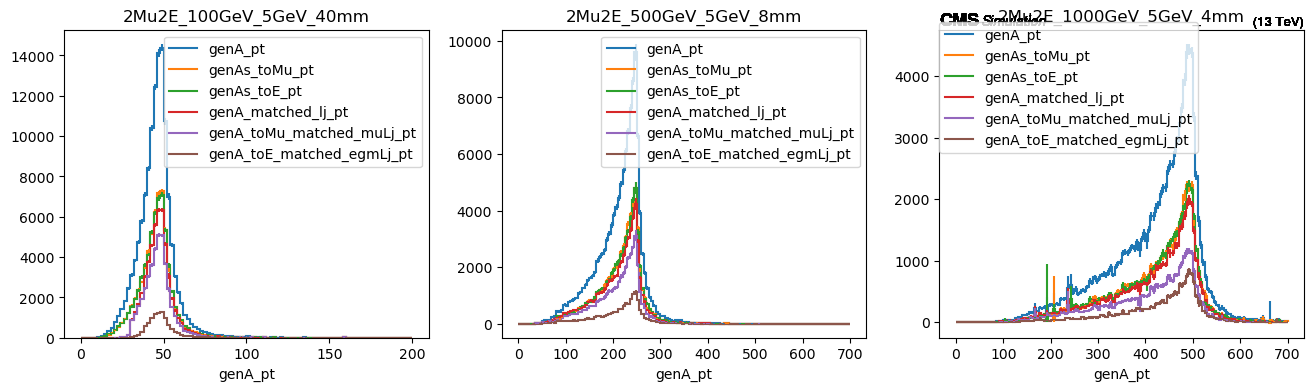

In [4]:
ch1 ="baseNoLj"

fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(16,4))

utilities.plot(output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_pt"][ch1,:],ax=ax1, density=False)
utilities.plot(output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genAs_toMu_pt"][ch1,:],ax=ax1, density=False)
utilities.plot(output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genAs_toE_pt"][ch1,:], ax=ax1, density=False)
utilities.plot(output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_matched_lj_pt"][ch1,:], ax=ax1, density=False)
utilities.plot(output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_toMu_matched_muLj_pt"][ch1,:], ax=ax1, density=False)
utilities.plot(output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_pt"][ch1,:], ax=ax1, density=False)

utilities.plot(output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_pt_highRange"][ch1,:],ax=ax2, density=False)
utilities.plot(output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genAs_toMu_pt_highRange"][ch1,:],ax=ax2, density=False)
utilities.plot(output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genAs_toE_pt_highRange"][ch1,:], ax=ax2, density=False)
utilities.plot(output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_matched_lj_pt_highRange"][ch1,:], ax=ax2, density=False)
utilities.plot(output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_toMu_matched_muLj_pt_highRange"][ch1,:], ax=ax2, density=False)
utilities.plot(output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch1,:], ax=ax2, density=False)

utilities.plot(output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_pt_highRange"][ch1,:],ax=ax3, density=False)
utilities.plot(output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genAs_toMu_pt_highRange"][ch1,:],ax=ax3, density=False)
utilities.plot(output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genAs_toE_pt_highRange"][ch1,:], ax=ax3, density=False)
utilities.plot(output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_matched_lj_pt_highRange"][ch1,:], ax=ax3, density=False)
utilities.plot(output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_toMu_matched_muLj_pt_highRange"][ch1,:], ax=ax3, density=False)
utilities.plot(output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch1,:], ax=ax3, density=False)
ax1.legend(["genA_pt",
            "genAs_toMu_pt",
            "genAs_toE_pt",
            "genA_matched_lj_pt",
            "genA_toMu_matched_muLj_pt",
            "genA_toE_matched_egmLj_pt",
           ])
ax2.legend(["genA_pt",
            "genAs_toMu_pt",
            "genAs_toE_pt",
            "genA_matched_lj_pt",
            "genA_toMu_matched_muLj_pt",
            "genA_toE_matched_egmLj_pt",
           ])
ax3.legend(["genA_pt",
            "genAs_toMu_pt",
            "genAs_toE_pt",
            "genA_matched_lj_pt",
            "genA_toMu_matched_muLj_pt",
            "genA_toE_matched_egmLj_pt",
           ], loc=(0, .6))
ax1.set_title("2Mu2E_100GeV_5GeV_40mm")
ax2.set_title("2Mu2E_500GeV_5GeV_8mm")
ax3.set_title("2Mu2E_1000GeV_5GeV_4mm")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_4mm')

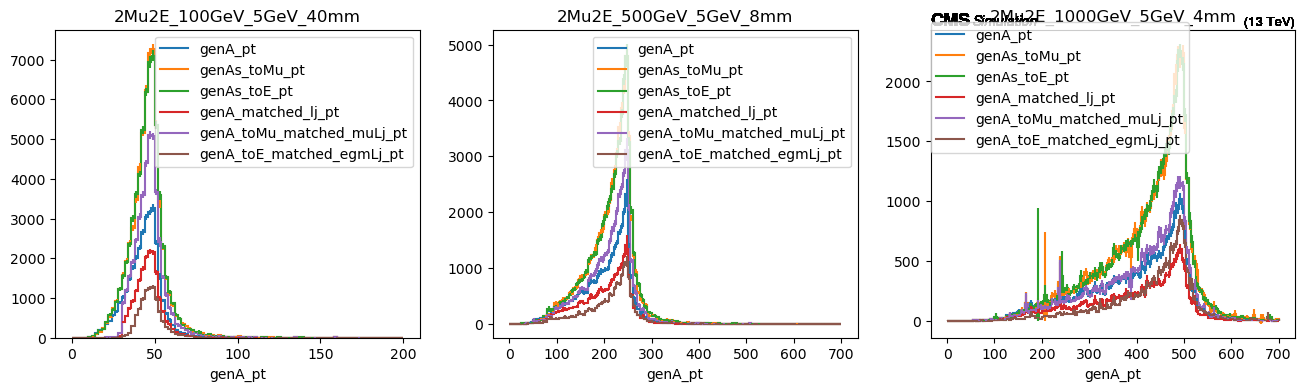

In [5]:
ch2 ="baseNoLj_promptA"

fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(16,4))

utilities.plot(output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_pt"][ch2,:],ax=ax1, density=False)
utilities.plot(output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genAs_toMu_pt"][ch2,:],ax=ax1, density=False)
utilities.plot(output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genAs_toE_pt"][ch2,:], ax=ax1, density=False)
utilities.plot(output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_matched_lj_pt"][ch2,:], ax=ax1, density=False)
utilities.plot(output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_toMu_matched_muLj_pt"][ch2,:], ax=ax1, density=False)
utilities.plot(output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_pt"][ch2,:], ax=ax1, density=False)

utilities.plot(output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_pt_highRange"][ch2,:],ax=ax2, density=False)
utilities.plot(output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genAs_toMu_pt_highRange"][ch2,:],ax=ax2, density=False)
utilities.plot(output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genAs_toE_pt_highRange"][ch2,:], ax=ax2, density=False)
utilities.plot(output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_matched_lj_pt_highRange"][ch2,:], ax=ax2, density=False)
utilities.plot(output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_toMu_matched_muLj_pt_highRange"][ch2,:], ax=ax2, density=False)
utilities.plot(output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch2,:], ax=ax2, density=False)

utilities.plot(output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_pt_highRange"][ch2,:],ax=ax3, density=False)
utilities.plot(output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genAs_toMu_pt_highRange"][ch2,:],ax=ax3, density=False)
utilities.plot(output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genAs_toE_pt_highRange"][ch2,:], ax=ax3, density=False)
utilities.plot(output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_matched_lj_pt_highRange"][ch2,:], ax=ax3, density=False)
utilities.plot(output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_toMu_matched_muLj_pt_highRange"][ch2,:], ax=ax3, density=False)
utilities.plot(output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch2,:], ax=ax3, density=False)
ax1.legend(["genA_pt",
            "genAs_toMu_pt",
            "genAs_toE_pt",
            "genA_matched_lj_pt",
            "genA_toMu_matched_muLj_pt",
            "genA_toE_matched_egmLj_pt",
           ])
ax2.legend(["genA_pt",
            "genAs_toMu_pt",
            "genAs_toE_pt",
            "genA_matched_lj_pt",
            "genA_toMu_matched_muLj_pt",
            "genA_toE_matched_egmLj_pt",
           ])
ax3.legend(["genA_pt",
            "genAs_toMu_pt",
            "genAs_toE_pt",
            "genA_matched_lj_pt",
            "genA_toMu_matched_muLj_pt",
            "genA_toE_matched_egmLj_pt",
           ], loc=(0, .6))
ax1.set_title("2Mu2E_100GeV_5GeV_40mm")
ax2.set_title("2Mu2E_500GeV_5GeV_8mm")
ax3.set_title("2Mu2E_1000GeV_5GeV_4mm")

In [6]:
ch3="baseNoLj_displacedA"
ch4="baseNoLj_veryDisplacedA"

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_40mm baseNolj')

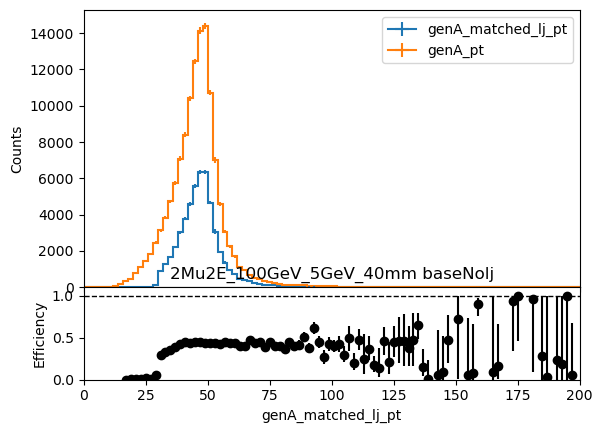

In [7]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_matched_lj_pt"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_pt"][ch1,:], 
       #rp_ylabel=r"Ratio",
       rp_num_label="genA_matched_lj_pt",
       rp_denom_label="genA_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_40mm baseNolj")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_40mm baseNoLj_promptA')

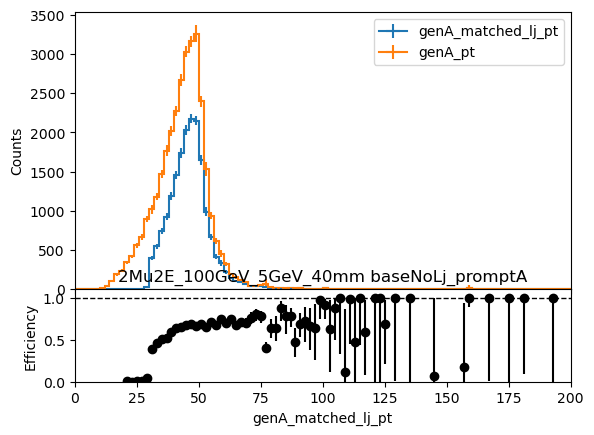

In [8]:
output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_matched_lj_pt"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_pt"][ch2,:], 
       #rp_ylabel=r"Ratio",
       rp_num_label="genA_matched_lj_pt",
       rp_denom_label="genA_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_40mm baseNoLj_promptA")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_40mm baseNoLj_displacedA')

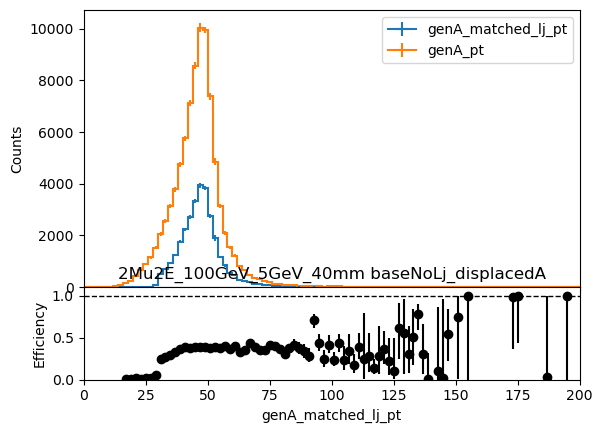

In [9]:
output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_matched_lj_pt"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_pt"][ch3,:], 
       #rp_ylabel=r"Ratio",
       rp_num_label="genA_matched_lj_pt",
       rp_denom_label="genA_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_40mm baseNoLj_displacedA")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_40mm baseNoLj_veryDisplacedA')

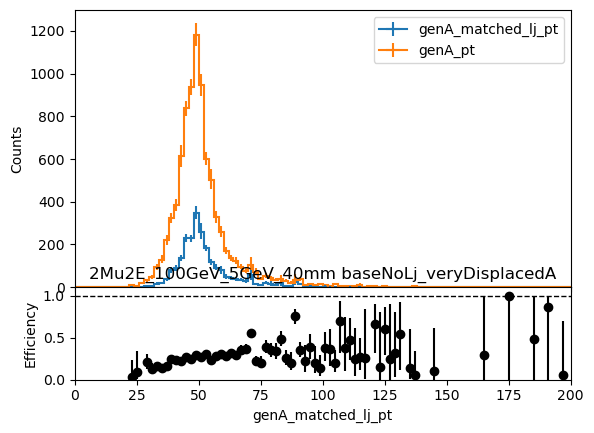

In [10]:
output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_matched_lj_pt"][ch4,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_pt"][ch4,:], 
       #rp_ylabel=r"Ratio",
       rp_num_label="genA_matched_lj_pt",
       rp_denom_label="genA_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_40mm baseNoLj_veryDisplacedA")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_8mm baseNoLj')

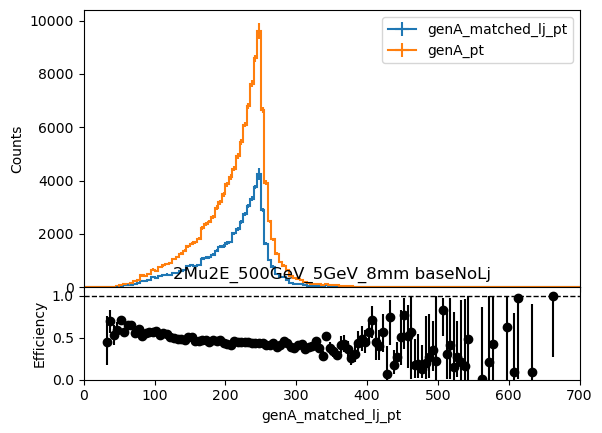

In [11]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_matched_lj_pt_highRange"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_pt_highRange"][ch1,:], 
       #rp_ylabel=r"Ratio",
       rp_num_label="genA_matched_lj_pt",
       rp_denom_label="genA_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_8mm baseNoLj")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_8mm oaseNoLj_promptA')

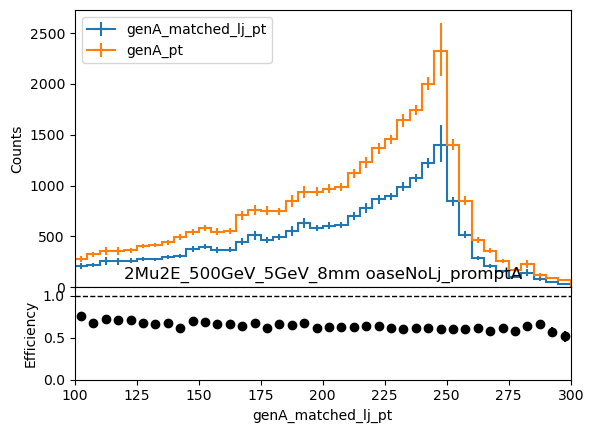

In [12]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_matched_lj_pt_highRange"][ch2,100j:300j].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_pt_highRange"][ch2,100j:300j], 
       #rp_ylabel=r"Ratio",
       rp_num_label="genA_matched_lj_pt",
       rp_denom_label="genA_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_8mm baseNoLj_promptA")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_8mm baseNoLj_displacedA')

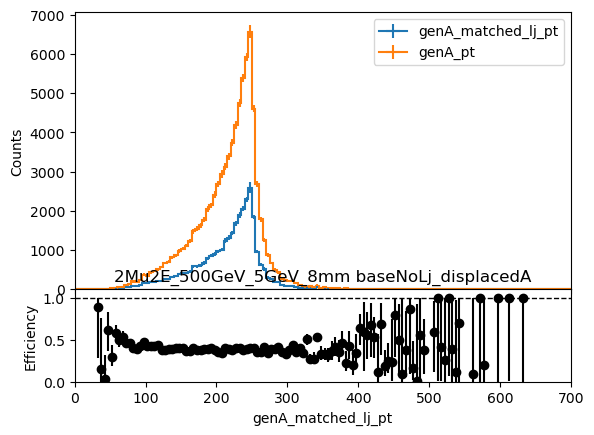

In [13]:
output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_matched_lj_pt_highRange"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_pt_highRange"][ch3,:], 
       #rp_ylabel=r"Ratio",
       rp_num_label="genA_matched_lj_pt",
       rp_denom_label="genA_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_8mm baseNoLj_displacedA")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_8mm baseNoLj_veryDispalcedA')

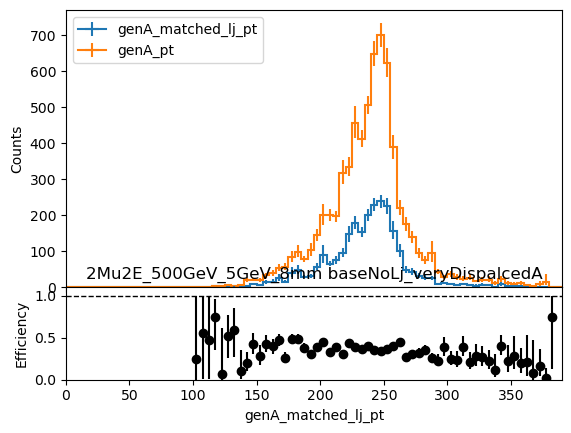

In [14]:
output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_matched_lj_pt_highRange"][ch4,:390j].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_pt_highRange"][ch4,:390j], 
       #rp_ylabel=r"Ratio",
       rp_num_label="genA_matched_lj_pt",
       rp_denom_label="genA_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_8mm baseNoLj_veryDispalcedA")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_4mm baseNoLj')

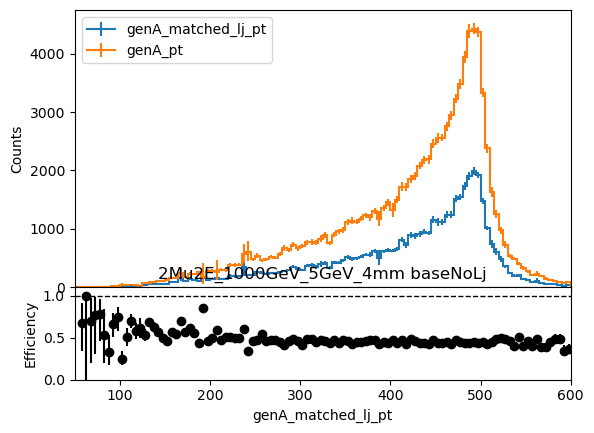

In [15]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_matched_lj_pt_highRange"][ch1,50j:600j].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_pt_highRange"][ch1,50j:600j], 
       #rp_ylabel=r"Ratio",
       rp_num_label="genA_matched_lj_pt",
       rp_denom_label="genA_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_4mm baseNoLj")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_4mm baseNoLj_promptA')

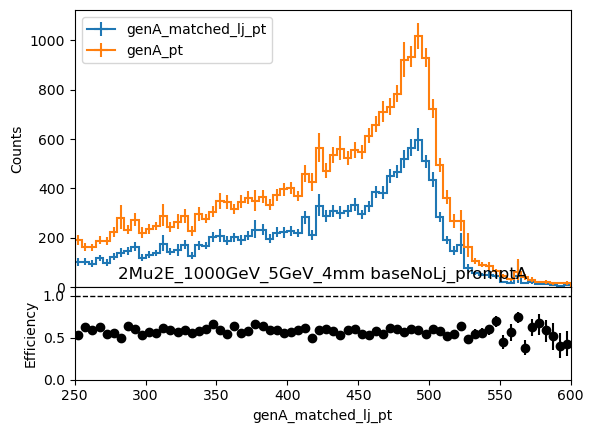

In [16]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_matched_lj_pt_highRange"][ch2,250j:600j].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_pt_highRange"][ch2,250j:600j], 
       #rp_ylabel=r"Ratio",
       rp_num_label="genA_matched_lj_pt",
       rp_denom_label="genA_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_4mm baseNoLj_promptA")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_4mm baseNoLj_displacedA')

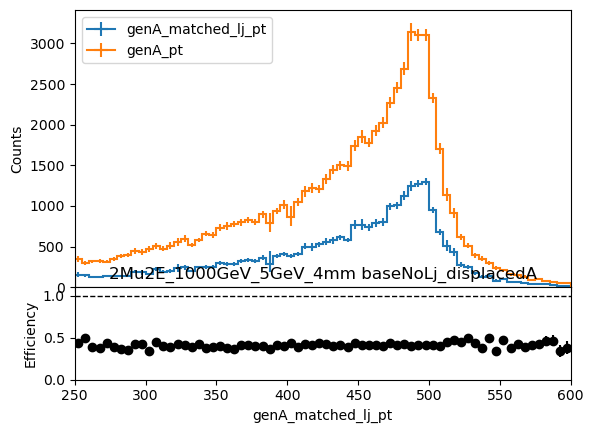

In [17]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_matched_lj_pt_highRange"][ch3,250j:600j].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_pt_highRange"][ch3,250j:600j], 
       #rp_ylabel=r"Ratio",
       rp_num_label="genA_matched_lj_pt",
       rp_denom_label="genA_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_4mm baseNoLj_displacedA")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_4mm baseNoLj_veryDisplacedA')

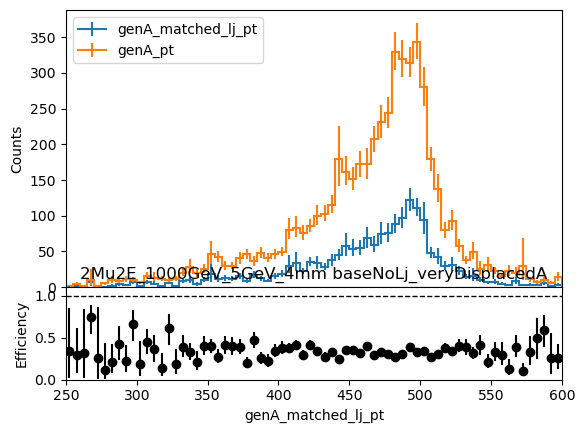

In [18]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_matched_lj_pt_highRange"][ch4,250j:600j].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_pt_highRange"][ch4,250j:600j], 
       #rp_ylabel=r"Ratio",
       rp_num_label="genA_matched_lj_pt",
       rp_denom_label="genA_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_4mm baseNoLj_veryDisplacedA")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_40mm baseNoLj')

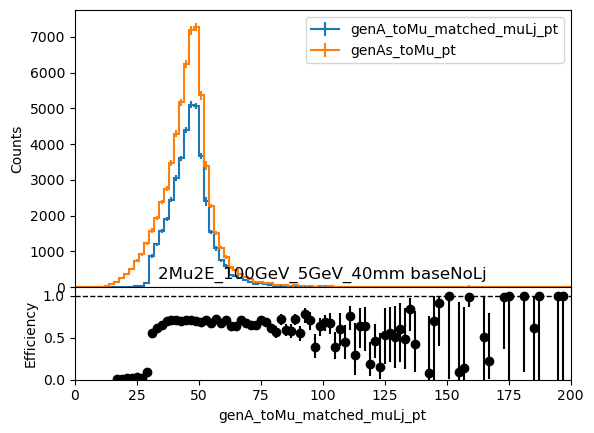

In [19]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_toMu_matched_muLj_pt"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genAs_toMu_pt"][ch1,:], 
       rp_num_label="genA_toMu_matched_muLj_pt",
       rp_denom_label="genAs_toMu_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_40mm baseNoLj")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_40mm baseNoLj_promptA')

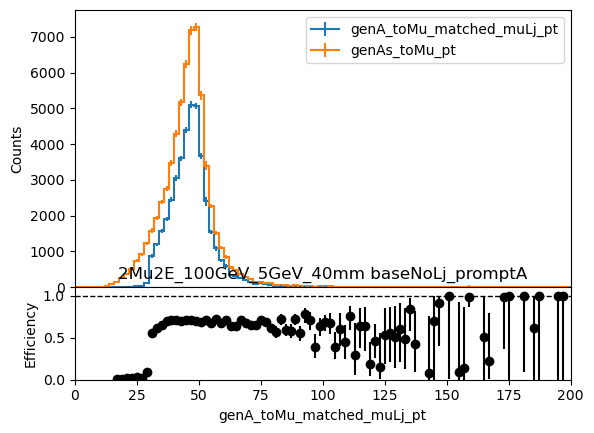

In [20]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_toMu_matched_muLj_pt"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genAs_toMu_pt"][ch2,:], 
       rp_num_label="genA_toMu_matched_muLj_pt",
       rp_denom_label="genAs_toMu_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_40mm baseNoLj_promptA")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_40mm baseNoLj_displacedA')

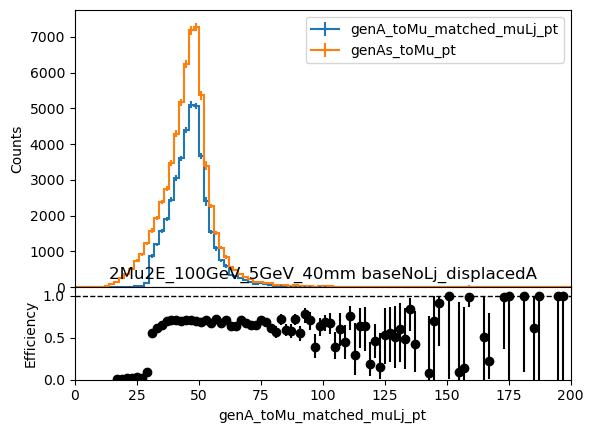

In [21]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_toMu_matched_muLj_pt"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genAs_toMu_pt"][ch3,:], 
       rp_num_label="genA_toMu_matched_muLj_pt",
       rp_denom_label="genAs_toMu_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_40mm baseNoLj_displacedA")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_40mm baseNoLj_veryDisplacedA')

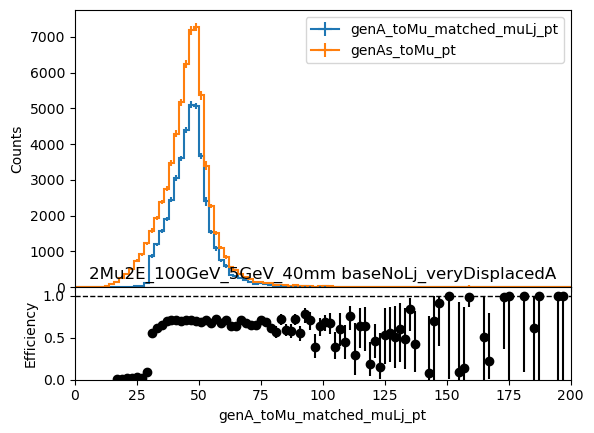

In [22]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_toMu_matched_muLj_pt"][ch4,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genAs_toMu_pt"][ch4,:], 
       rp_num_label="genA_toMu_matched_muLj_pt",
       rp_denom_label="genAs_toMu_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_40mm baseNoLj_veryDisplacedA")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_8mm baseNoLj')

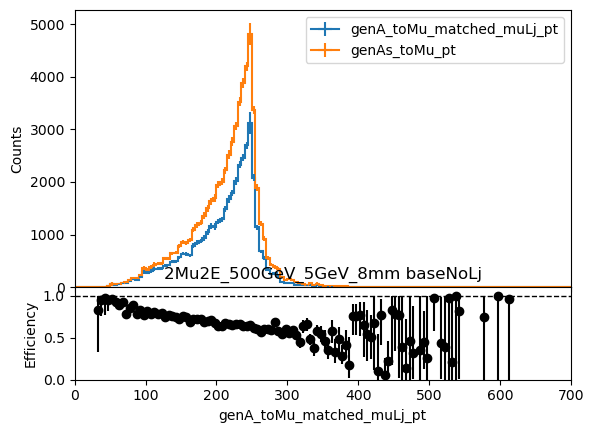

In [23]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_toMu_matched_muLj_pt_highRange"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genAs_toMu_pt_highRange"][ch1,:], 
       rp_num_label="genA_toMu_matched_muLj_pt",
       rp_denom_label="genAs_toMu_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_8mm baseNoLj")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_8mm baseNoLj_promptA')

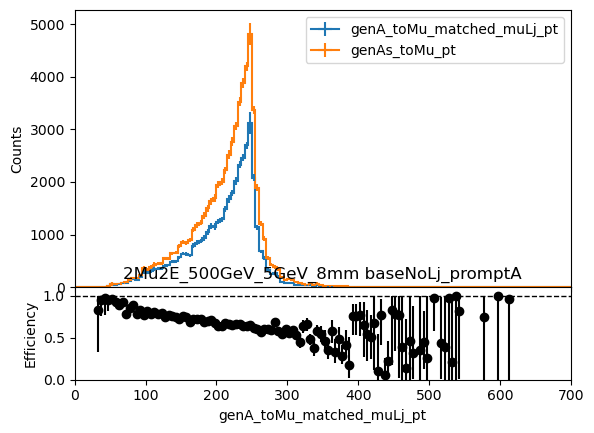

In [24]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_toMu_matched_muLj_pt_highRange"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genAs_toMu_pt_highRange"][ch2,:], 
       rp_num_label="genA_toMu_matched_muLj_pt",
       rp_denom_label="genAs_toMu_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_8mm baseNoLj_promptA")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_8mm baseNoLj_displacedA')

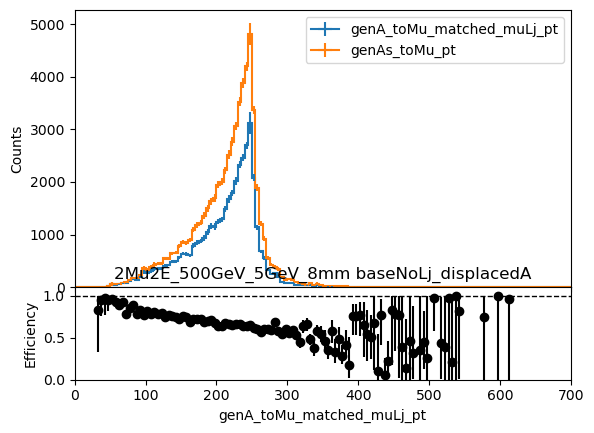

In [25]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_toMu_matched_muLj_pt_highRange"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genAs_toMu_pt_highRange"][ch3,:], 
       rp_num_label="genA_toMu_matched_muLj_pt",
       rp_denom_label="genAs_toMu_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_8mm baseNoLj_displacedA")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_8mm baseNoLj_veryDisplacedA')

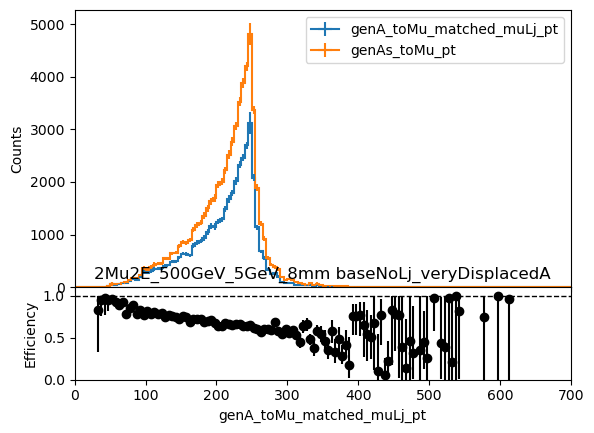

In [26]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_toMu_matched_muLj_pt_highRange"][ch4,:].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genAs_toMu_pt_highRange"][ch4,:], 
       rp_num_label="genA_toMu_matched_muLj_pt",
       rp_denom_label="genAs_toMu_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_8mm baseNoLj_veryDisplacedA")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_4mm baseNoLj')

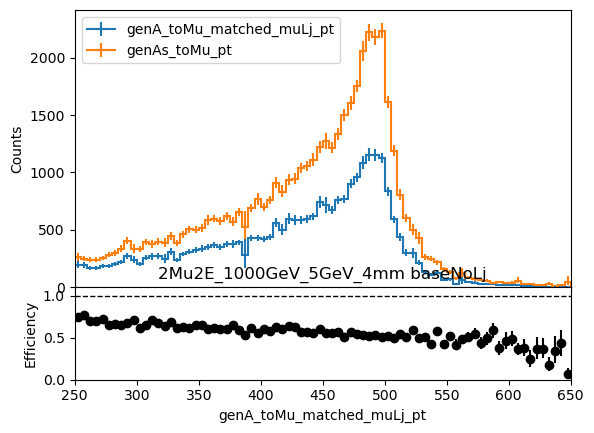

In [27]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_toMu_matched_muLj_pt_highRange"][ch1,250j:650j].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genAs_toMu_pt_highRange"][ch1,250j:650j], 
       rp_num_label="genA_toMu_matched_muLj_pt",
       rp_denom_label="genAs_toMu_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency"
       )
plt.title("2Mu2E_1000GeV_5GeV_4mm baseNoLj")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_4mm baseNoLj_promptA')

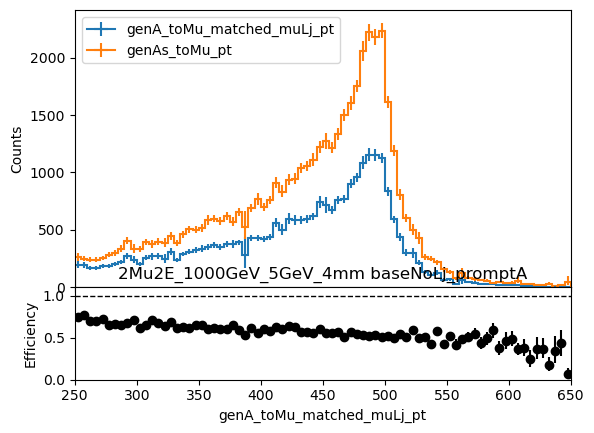

In [28]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_toMu_matched_muLj_pt_highRange"][ch2,250j:650j].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genAs_toMu_pt_highRange"][ch2,250j:650j], 
       rp_num_label="genA_toMu_matched_muLj_pt",
       rp_denom_label="genAs_toMu_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency"
       )
plt.title("2Mu2E_1000GeV_5GeV_4mm baseNoLj_promptA")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_4mm baseNoLj_displacedA')

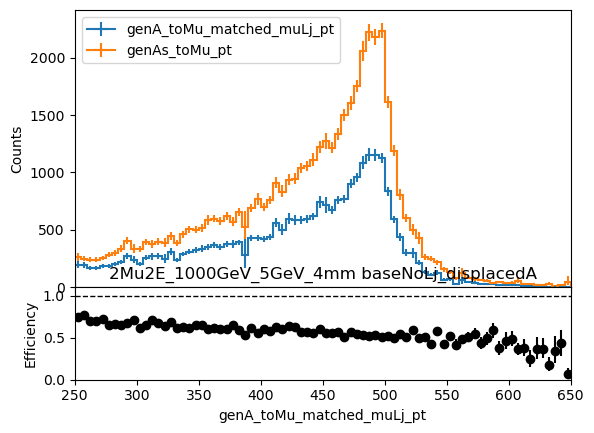

In [29]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_toMu_matched_muLj_pt_highRange"][ch3,250j:650j].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genAs_toMu_pt_highRange"][ch3,250j:650j], 
       rp_num_label="genA_toMu_matched_muLj_pt",
       rp_denom_label="genAs_toMu_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency"
       )
plt.title("2Mu2E_1000GeV_5GeV_4mm baseNoLj_displacedA")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_4mm baseNoLj_veryDisplacedA')

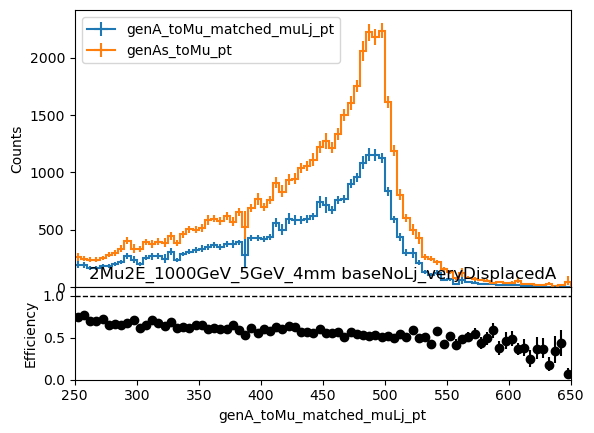

In [30]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_toMu_matched_muLj_pt_highRange"][ch4,250j:650j].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genAs_toMu_pt_highRange"][ch4,250j:650j], 
       rp_num_label="genA_toMu_matched_muLj_pt",
       rp_denom_label="genAs_toMu_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency"
       )
plt.title("2Mu2E_1000GeV_5GeV_4mm baseNoLj_veryDisplacedA")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_40mm baseNoLj')

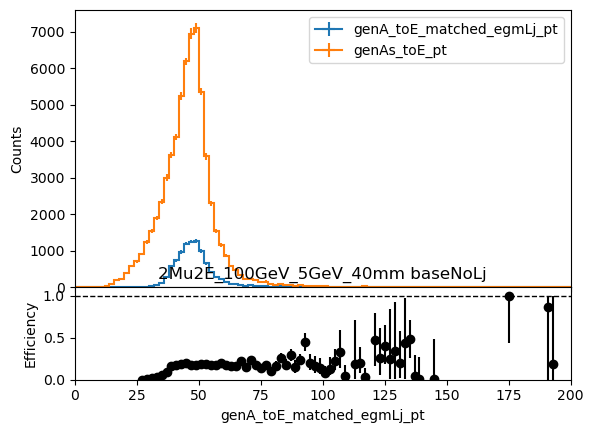

In [31]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_pt"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genAs_toE_pt"][ch1,:], 
       rp_num_label="genA_toE_matched_egmLj_pt",
       rp_denom_label="genAs_toE_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_40mm baseNoLj")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_40mm baseNoLj_promptA')

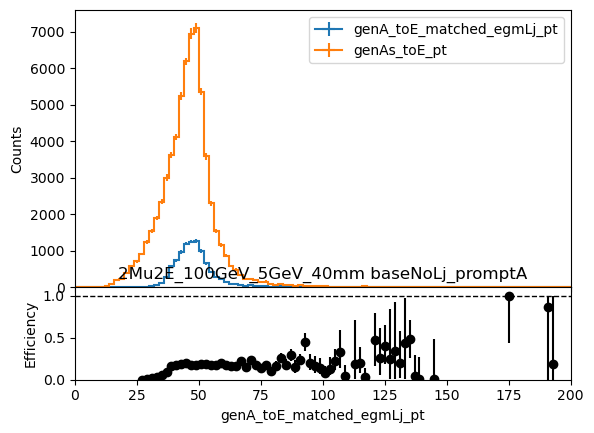

In [32]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_pt"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genAs_toE_pt"][ch2,:], 
       rp_num_label="genA_toE_matched_egmLj_pt",
       rp_denom_label="genAs_toE_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_40mm baseNoLj_promptA")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_40mm baseNoLj_displacedA')

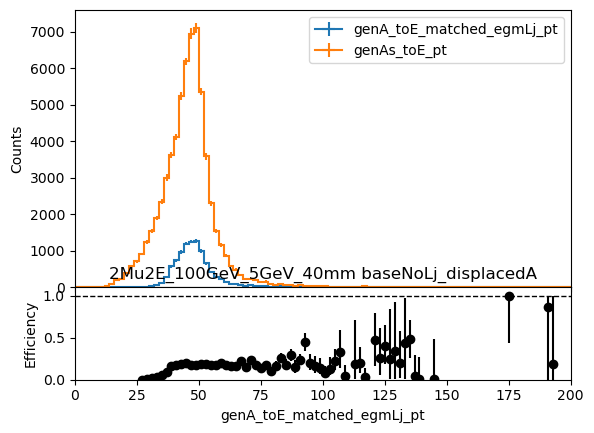

In [33]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_pt"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genAs_toE_pt"][ch3,:], 
       rp_num_label="genA_toE_matched_egmLj_pt",
       rp_denom_label="genAs_toE_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_40mm baseNoLj_displacedA")

Text(0.5, 1.0, '2Mu2E_100GeV_5GeV_40mm baseNoLj_veryDisplacedA')

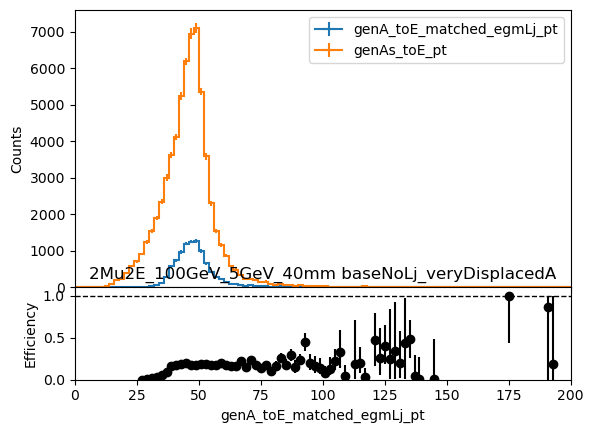

In [34]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_pt"][ch4,:].plot_ratio(
       output["out"]["2Mu2E_100GeV_5GeV_40mm"]["hists"]["genAs_toE_pt"][ch4,:], 
       rp_num_label="genA_toE_matched_egmLj_pt",
       rp_denom_label="genAs_toE_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_100GeV_5GeV_40mm baseNoLj_veryDisplacedA")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_8mm baseNoLj')

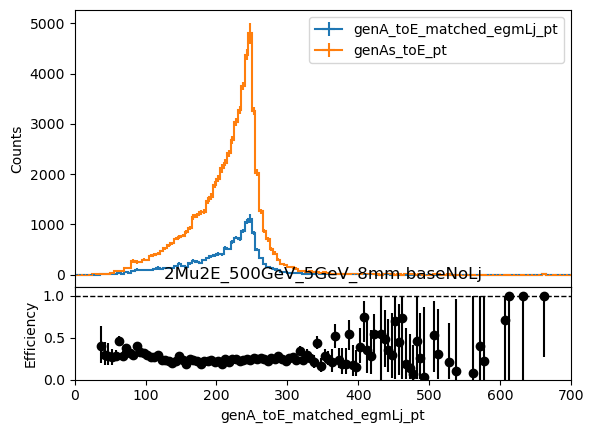

In [35]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genAs_toE_pt_highRange"][ch1,:], 
       rp_num_label="genA_toE_matched_egmLj_pt",
       rp_denom_label="genAs_toE_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_8mm baseNoLj")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_8mm baseNoLj_promptA')

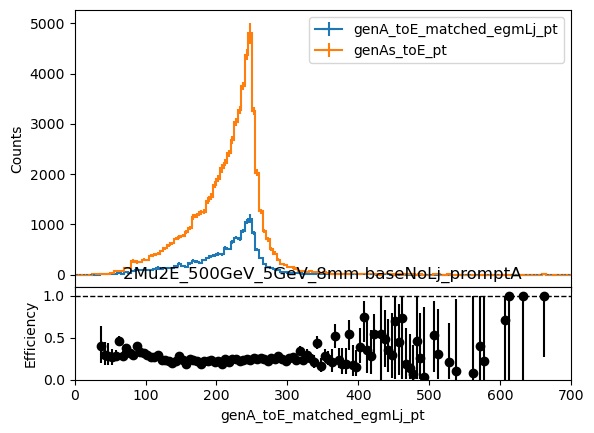

In [36]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genAs_toE_pt_highRange"][ch2,:], 
       rp_num_label="genA_toE_matched_egmLj_pt",
       rp_denom_label="genAs_toE_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_8mm baseNoLj_promptA")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_8mm baseNoLj_displacedA')

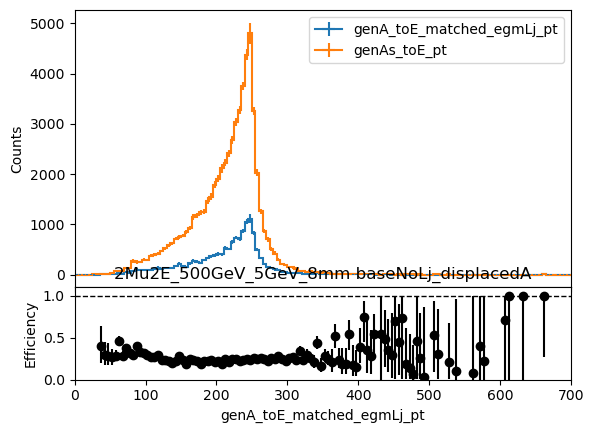

In [37]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genAs_toE_pt_highRange"][ch3,:], 
       rp_num_label="genA_toE_matched_egmLj_pt",
       rp_denom_label="genAs_toE_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_8mm baseNoLj_displacedA")

Text(0.5, 1.0, '2Mu2E_500GeV_5GeV_8mm baseNoLj_veryDisplacedA')

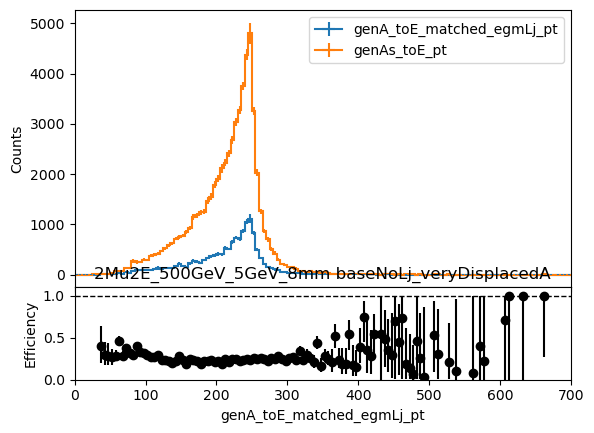

In [38]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch4,:].plot_ratio(
       output["out"]["2Mu2E_500GeV_5GeV_8mm"]["hists"]["genAs_toE_pt_highRange"][ch4,:], 
       rp_num_label="genA_toE_matched_egmLj_pt",
       rp_denom_label="genAs_toE_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_500GeV_5GeV_8mm baseNoLj_veryDisplacedA")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_4mm baseNoLj')

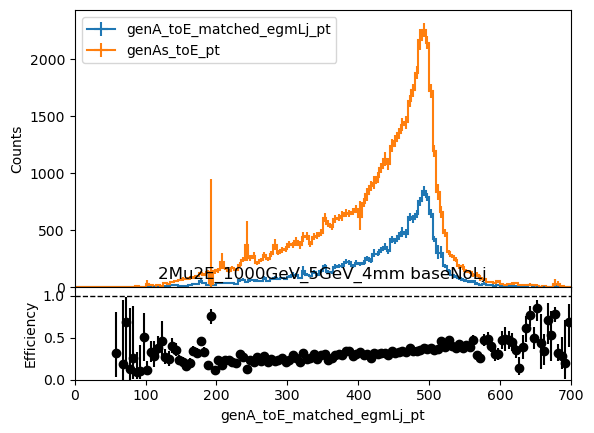

In [39]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genAs_toE_pt_highRange"][ch1,:], 
       rp_num_label="genA_toE_matched_egmLj_pt",
       rp_denom_label="genAs_toE_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_4mm baseNoLj")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_4mm baseNoLj_promptA')

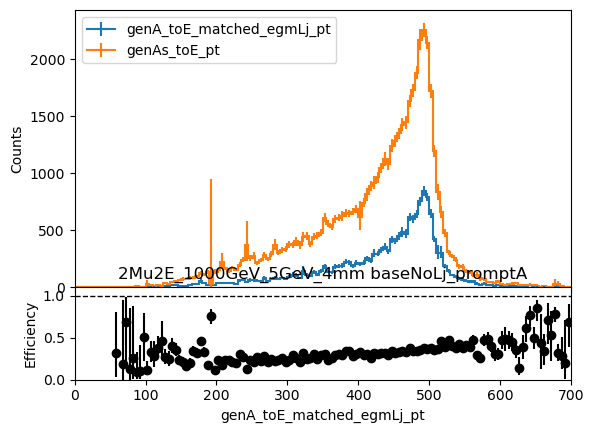

In [40]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genAs_toE_pt_highRange"][ch2,:], 
       rp_num_label="genA_toE_matched_egmLj_pt",
       rp_denom_label="genAs_toE_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_4mm baseNoLj_promptA")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_4mm baseNoLj_displacedA ')

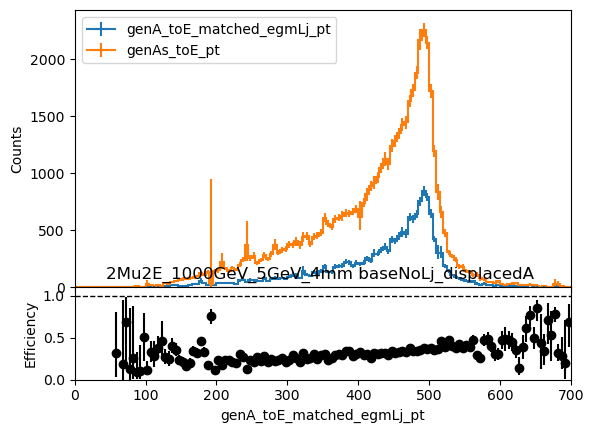

In [41]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genAs_toE_pt_highRange"][ch3,:], 
       rp_num_label="genA_toE_matched_egmLj_pt",
       rp_denom_label="genAs_toE_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_4mm baseNoLj_displacedA ")

Text(0.5, 1.0, '2Mu2E_1000GeV_5GeV_4mm baseNoLj_veryDisplacedA')

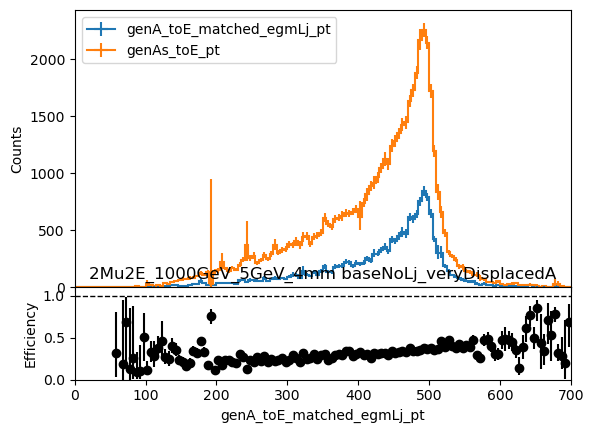

In [42]:
#plt.figure(figsize=(10,6))
output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch4,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_4mm"]["hists"]["genAs_toE_pt_highRange"][ch4,:], 
       rp_num_label="genA_toE_matched_egmLj_pt",
       rp_denom_label="genAs_toE_pt",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_1000GeV_5GeV_4mm baseNoLj_veryDisplacedA")